In [1]:
import math
 
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import grover_operator, MCMTGate, ZGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
 
def grover_oracle(marked_states: list[str]) -> QuantumCircuit: 
    num_qubits = len(marked_states[0])
 
    qc = QuantumCircuit(num_qubits)
    for target in marked_states:
        print(target)
        rev_target = target[::-1]
        zero_inds = [
            ind
            for ind in range(num_qubits)
            if rev_target.startswith("0", ind)
        ]
        print(zero_inds)
        if zero_inds:
            qc.x(zero_inds)
        qc.compose(MCMTGate(ZGate(), num_qubits - 1, 1), inplace=True)
        if zero_inds:
            qc.x(zero_inds)
        
        qc.barrier()
    return qc

0110
[0, 3]
1001
[1, 2]


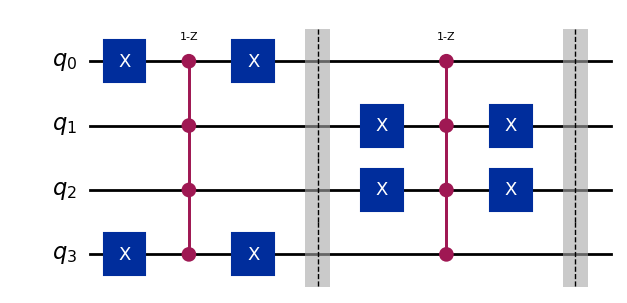

In [2]:
marked_states = ["0110", "1001"]
 
oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

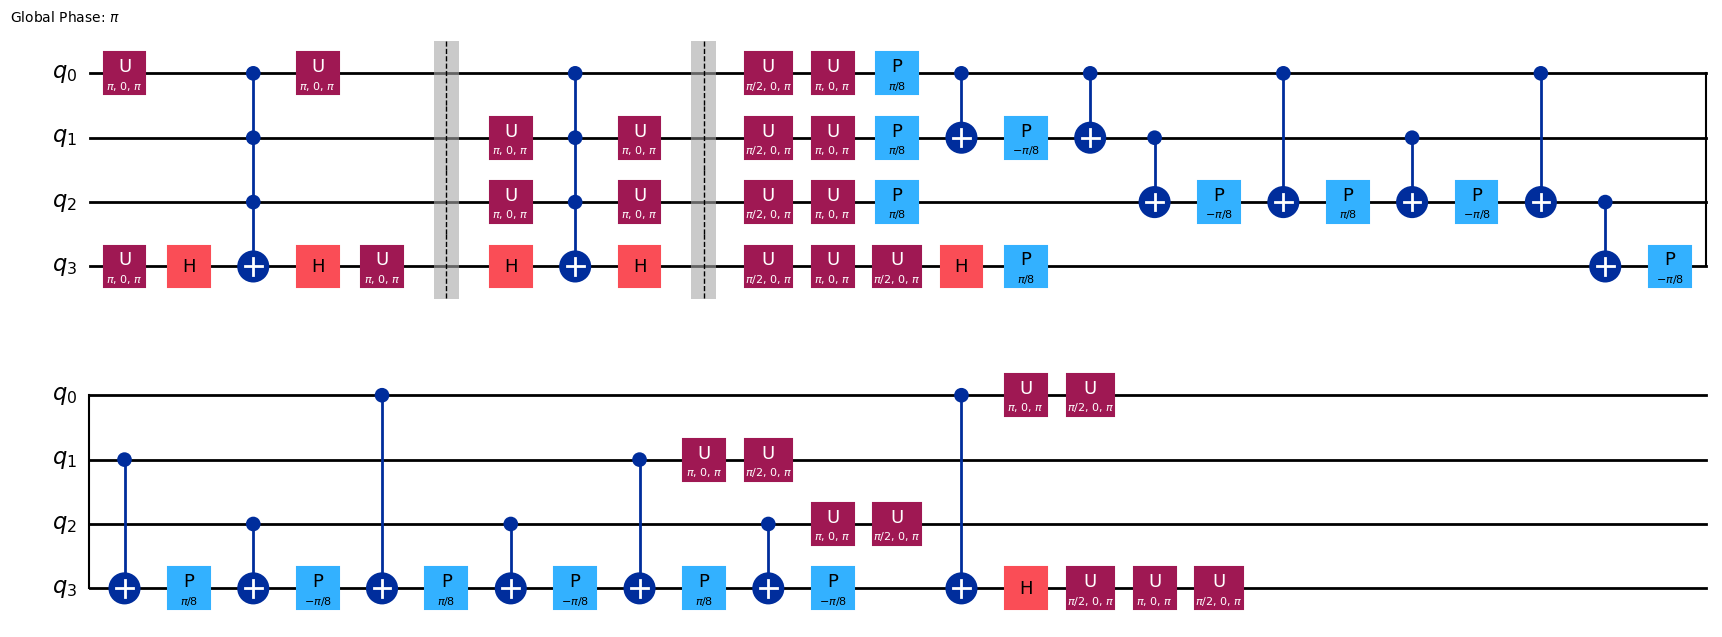

In [3]:
grover_op = grover_operator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

In [4]:
N = 2**grover_op.num_qubits
M = len(marked_states)
optimal_num_iterations = math.floor(math.pi / (4 * math.asin(math.sqrt(M/N))))

print("iterations:", optimal_num_iterations) # iterations: 2

iterations: 2


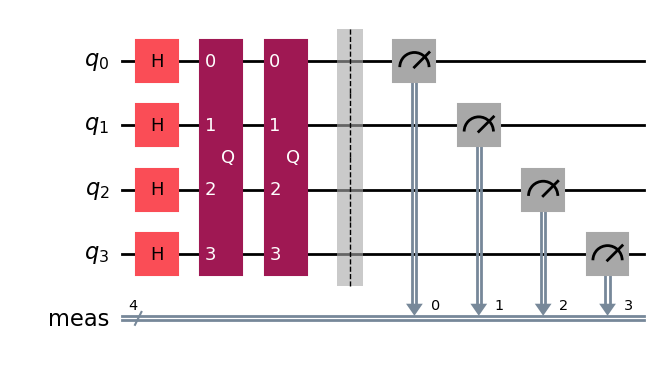

In [5]:
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")

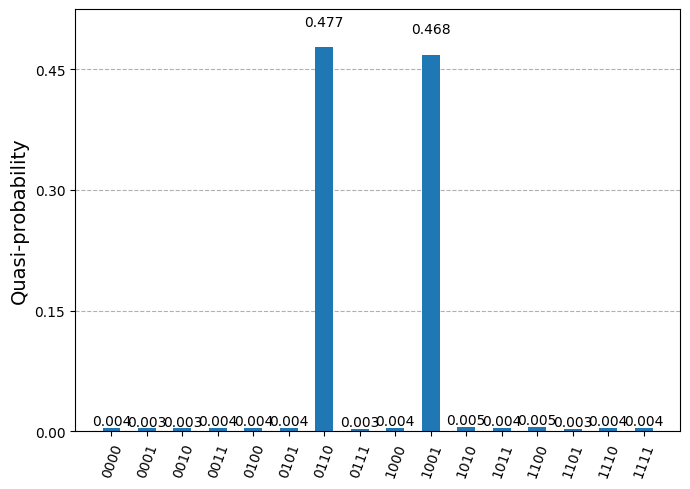

In [6]:
sim_statevector = AerSimulator(method='statevector')
grover = transpile(qc, sim_statevector)

job_statevector = sim_statevector.run(grover, shots=10000)
dist = job_statevector.result().get_counts()

plot_distribution(dist)